<a href="https://colab.research.google.com/github/kushaldahal0/text-emotion-analysis/blob/main/emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import tensorflowjs as tfjs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/emotion.csv'

In [ ]:
dataset = pd.read_csv(file_path)
dataset

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4
...,...,...,...
416804,416804,i feel like telling these horny devils to find...,2
416805,416805,i began to realize that when i was feeling agi...,3
416806,416806,i feel very curious be why previous early dawn...,5
416807,416807,i feel that becuase of the tyranical nature of...,3


In [ ]:
dataset = dataset.drop('Unnamed: 0',axis = 1)

In [ ]:
# Six categories: sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5).
categs = {0:'sadness', 1:'joy',2:'love',3:'anger',4:'fear',5:'surprise'}

In [ ]:
num_cats = len(categs)

In [ ]:
total_len = len(dataset)
train_len = int(0.8 * total_len)
train_data = dataset[:train_len]
test_data = dataset[train_len:]

In [ ]:
# val_len = int(0.8*train_len)
# train_dataa = train_data[:val_len]
# val_data = train_data[val_len:]

In [ ]:
train_data

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4
...,...,...
333442,i don t feel vulnerable admitting it in fact a...,4
333443,i croak the last of that feeling myself wilt a...,1
333444,i feel so rich in the love of my friends and f...,1
333445,i am really happy the cross arms hand holdings...,1


In [ ]:
# val_data

In [ ]:
test_data

,text,label
333447,i cant wait for it to warm up so we can explor...,1
333448,i can already feel the shitty feeling u get wh...,0
333449,i paid for it on todays long trail run which a...,0
333450,i feel fabulous in would be willing to buy at ...,1
333451,i feel like bill cosby which would be funny we...,5
...,...,...
416804,i feel like telling these horny devils to find...,2
416805,i began to realize that when i was feeling agi...,3
416806,i feel very curious be why previous early dawn...,5
416807,i feel that becuase of the tyranical nature of...,3


In [ ]:
# train_labels, val_labels, test_labels = train_dataa.pop('label'), val_data.pop('label'), test_data.pop('label')
train_labels,test_labels = train_data.pop('label'), test_data.pop('label')

In [ ]:
# train_labels, val_labels, test_labels = tf.one_hot(train_labels, depth = num_cats),tf.one_hot(val_labels, depth=num_cats),tf.one_hot(test_labels, depth=num_cats)
train_labels, test_labels = tf.one_hot(train_labels, depth = num_cats),tf.one_hot(test_labels, depth=num_cats)

In [ ]:
train_labels

<tf.Tensor: shape=(333447, 6), dtype=float32, numpy=
array([[0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)>

In [ ]:
# val_labels

In [ ]:
test_labels

<tf.Tensor: shape=(83362, 6), dtype=float32, numpy=
array([[0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)>

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (train_data['text'].values, train_labels)
    )
# val_ds = tf.data.Dataset.from_tensor_slices(
#     (val_data['text'].values, val_labels)
#     )
test_ds = tf.data.Dataset.from_tensor_slices(
    (test_data['text'].values, test_labels)
    )

In [ ]:
buffer_size = 100
batch_size = 32

train_ds = train_ds.shuffle(buffer_size).batch(batch_size).prefetch(tf.data.AUTOTUNE)
# val_ds = val_ds.shuffle(buffer_size).batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [ ]:
vec = layers.TextVectorization(
    output_mode='int',
    max_tokens=7000,
    output_sequence_length=400,
)

vec.adapt(train_ds.map(lambda text, label: text))

In [ ]:
vocab = np.array(vec.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'i', 'feel', 'and', 'to', 'the', 'a', 'feeling',
       'that', 'of', 'my', 'in', 'it', 'like', 'so', 'for', 'im', 'have',
       'me'], dtype='<U20')

In [ ]:
vocab_len = len(vec.get_vocabulary())
vocab_len

7000

In [ ]:
model = tf.keras.Sequential([
    vec,
    layers.Embedding(
        vocab_len,
        32,
        mask_zero=True,
    ),
    layers.LSTM(32),
    # layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_cats, activation='softmax')
])


model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# model.build()
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_2 (Text  (None, 400)               0         
 Vectorization)                                                  
                                                                 
 embedding_8 (Embedding)     (None, 400, 32)           224000    
                                                                 
 lstm_8 (LSTM)               (None, 32)                8320      
                                                                 
 dense_18 (Dense)            (None, 64)                2112      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 6)                 390       
                                                      

In [ ]:
# !pip show tensorflow


Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine-rl, tf_keras


In [ ]:
epochs = 2
history = model.fit(
    train_ds,
    validation_data=test_ds,
    validation_steps=15,
    epochs=epochs,
)

Epoch 1/2
10421/10421 [==============================] - 118s 11ms/step - loss: 0.0876 - accuracy: 0.9423 - val_loss: 0.0909 - val_accuracy: 0.9396
Epoch 2/2
10421/10421 [==============================] - 110s 11ms/step - loss: 0.0848 - accuracy: 0.9431 - val_loss: 0.0949 - val_accuracy: 0.9396


In [ ]:
# test_loss, test_acc = model.evaluate(test_ds)

Text(0.5, 1.0, 'Training and Validation Accuracy')

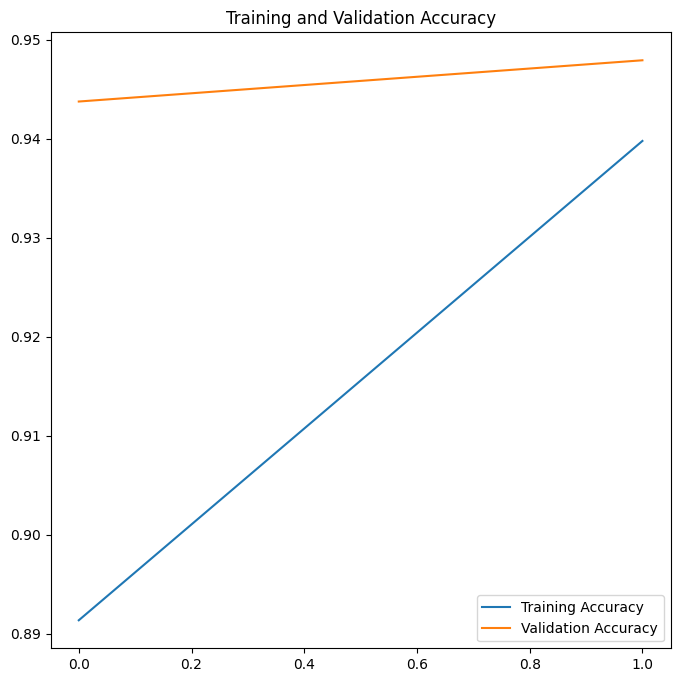

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

In [ ]:
def predict(text):
  text_slice  = tf.data.Dataset.from_tensor_slices([text])
  prefetched = text_slice.batch(batch_size).prefetch(tf.data.AUTOTUNE)
  res = model.predict(prefetched)
  print(res)
  probabilities = np.exp(res) / np.sum(np.exp(res), axis=1, keepdims=True)
  predicted_class_index = np.argmax(probabilities)
  print(categs[predicted_class_index])


In [ ]:
# Six categories: sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5).

In [ ]:
text = "i am extremely surprised that this is not we wanted!"
predict(text)

1/1 [==============================] - 0s 19ms/step
[[0.11891747 0.07998668 0.06641685 0.00861472 0.07993013 0.64613414]]
surprise


In [ ]:
# model.save("modell93.tf", save_format="tf")
model.save("modell93.keras")

In [ ]:
!zip -r /content/modell93.zip /content/modell93.tf/

  adding: content/modell93.tf/ (stored 0%)
  adding: content/modell93.tf/fingerprint.pb (stored 0%)
  adding: content/modell93.tf/assets/ (stored 0%)
  adding: content/modell93.tf/variables/ (stored 0%)
  adding: content/modell93.tf/variables/variables.index (deflated 60%)
  adding: content/modell93.tf/variables/variables.data-00000-of-00001 (deflated 6%)
  adding: content/modell93.tf/saved_model.pb (deflated 88%)
  adding: content/modell93.tf/keras_metadata.pb (deflated 88%)


In [ ]:
from google.colab import files
files.download("/content/emotion_93.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# !pip install tensorflowjs
# !tensorflowjs_converter --input_format keras "emotion.h5" ./jsmodel